In [1]:
import pandas as pd 
import matplotlib.pyplot as plt 
import seaborn as sns
%matplotlib inline
df=pd.read_csv('london_merged.csv')
df.head()

,timestamp,cnt,t1,t2,hum,wind_speed,weather_code,is_holiday,is_weekend,season
0,2015-01-04 00:00:00,182,3.0,2.0,93.0,6.0,3.0,0.0,1.0,3.0
1,2015-01-04 01:00:00,138,3.0,2.5,93.0,5.0,1.0,0.0,1.0,3.0
2,2015-01-04 02:00:00,134,2.5,2.5,96.5,0.0,1.0,0.0,1.0,3.0
3,2015-01-04 03:00:00,72,2.0,2.0,100.0,0.0,1.0,0.0,1.0,3.0
4,2015-01-04 04:00:00,47,2.0,0.0,93.0,6.5,1.0,0.0,1.0,3.0


The metadata of the columns:

"timestamp" - timestamp field for grouping the data
"cnt" - the count of a new bike shares
"t1" - real temperature in C
"t2" - temperature in C "feels like"
"hum" - humidity in percentage
"windspeed" - wind speed in km/h
"weather_code" - category of the weather
"is_holiday" - boolean field - 1 holiday / 0 non holiday
"is_weekend" - boolean field - 1 if the day is weekend
"season" - category field meteorological seasons: 0-spring ; 1-summer; 2-fall; 3-winter.

"weather_code" category description: 1 = Clear ; mostly clear but have some values with haze/fog/patches of fog/ fog in vicinity 2 = scattered clouds / few clouds 3 = Broken clouds 4 = Cloudy 7 = Rain/ light Rain shower/ Light rain 10 = rain with thunderstorm 26 = snowfall 94 = Freezing Fog

In [2]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17414 entries, 0 to 17413
Data columns (total 10 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   timestamp     17414 non-null  object 
 1   cnt           17414 non-null  int64  
 2   t1            17414 non-null  float64
 3   t2            17414 non-null  float64
 4   hum           17414 non-null  float64
 5   wind_speed    17414 non-null  float64
 6   weather_code  17414 non-null  float64
 7   is_holiday    17414 non-null  float64
 8   is_weekend    17414 non-null  float64
 9   season        17414 non-null  float64
dtypes: float64(8), int64(1), object(1)
memory usage: 1.3+ MB


In [3]:
df.shape

(17414, 10)

In [4]:
df.weather_code.value_counts()

1.0     6150
2.0     4034
3.0     3551
7.0     2141
4.0     1464
26.0      60
10.0      14
Name: weather_code, dtype: int64

In [5]:
df.season.value_counts()

0.0    4394
1.0    4387
3.0    4330
2.0    4303
Name: season, dtype: int64

In [6]:
df.columns

Index(['timestamp', 'cnt', 't1', 't2', 'hum', 'wind_speed', 'weather_code',
       'is_holiday', 'is_weekend', 'season'],
      dtype='object')

In [7]:
## renaming the columns to a readable format
new_cols={
    'timestamp':'time',
    'cnt':'count',
    't1':'temp_real_C',
    't2':'temp_feel_like_C',
    'hum':'humidity_perc',
    'wind_speed':'wind_speed_kmph',
    'weather_code':'weather',
    'is_holiday':'is_holiday',
    'is_weekend':'is_weekend',
    'season':'season'
}

## let's rename the columns
df.rename(new_cols,axis=1,inplace=True)
df.head()

,time,count,temp_real_C,temp_feel_like_C,humidity_perc,wind_speed_kmph,weather,is_holiday,is_weekend,season
0,2015-01-04 00:00:00,182,3.0,2.0,93.0,6.0,3.0,0.0,1.0,3.0
1,2015-01-04 01:00:00,138,3.0,2.5,93.0,5.0,1.0,0.0,1.0,3.0
2,2015-01-04 02:00:00,134,2.5,2.5,96.5,0.0,1.0,0.0,1.0,3.0
3,2015-01-04 03:00:00,72,2.0,2.0,100.0,0.0,1.0,0.0,1.0,3.0
4,2015-01-04 04:00:00,47,2.0,0.0,93.0,6.5,1.0,0.0,1.0,3.0


In [8]:
## lets convert the humidity perc value between 0 and 1
df.humidity_perc=df.humidity_perc/100

In [9]:
## let's map the season code value to the corresponding season
season_dict = {
    0.0:'spring',
    1.0:'summer',
    2.0:'autumn',
    3.0:'winter'
}

## mapping the weather codes to the weather condition
weather_dict = {
    1.0:'Clear',
    2.0:'Scattered clouds',
    3.0:'Broken clouds',
    4.0:'Cloudy',
    7.0:'Rain',
    10.0:'Rain with thunderstorm',
    26.0:'Snowfall'
}
df.weather=df.weather.map(weather_dict)
df.season=df.season.map(season_dict)
df.head()

,time,count,temp_real_C,temp_feel_like_C,humidity_perc,wind_speed_kmph,weather,is_holiday,is_weekend,season
0,2015-01-04 00:00:00,182,3.0,2.0,0.930,6.0,Broken clouds,0.0,1.0,winter
1,2015-01-04 01:00:00,138,3.0,2.5,0.930,5.0,Clear,0.0,1.0,winter
2,2015-01-04 02:00:00,134,2.5,2.5,0.965,0.0,Clear,0.0,1.0,winter
3,2015-01-04 03:00:00,72,2.0,2.0,1.000,0.0,Clear,0.0,1.0,winter
4,2015-01-04 04:00:00,47,2.0,0.0,0.930,6.5,Clear,0.0,1.0,winter


In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17414 entries, 0 to 17413
Data columns (total 10 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   time              17414 non-null  object 
 1   count             17414 non-null  int64  
 2   temp_real_C       17414 non-null  float64
 3   temp_feel_like_C  17414 non-null  float64
 4   humidity_perc     17414 non-null  float64
 5   wind_speed_kmph   17414 non-null  float64
 6   weather           17414 non-null  object 
 7   is_holiday        17414 non-null  float64
 8   is_weekend        17414 non-null  float64
 9   season            17414 non-null  object 
dtypes: float64(6), int64(1), object(3)
memory usage: 1.3+ MB


Now we have the data in the format needed lets export it as excel file and create our dashboard over tableau

In [11]:
df.to_excel('london_bikes_final.xlsx',sheet_name='Bikes_Data')

## let's explore the data

In [12]:
data=pd.read_csv('london_merged.csv')
data.head()

,timestamp,cnt,t1,t2,hum,wind_speed,weather_code,is_holiday,is_weekend,season
0,2015-01-04 00:00:00,182,3.0,2.0,93.0,6.0,3.0,0.0,1.0,3.0
1,2015-01-04 01:00:00,138,3.0,2.5,93.0,5.0,1.0,0.0,1.0,3.0
2,2015-01-04 02:00:00,134,2.5,2.5,96.5,0.0,1.0,0.0,1.0,3.0
3,2015-01-04 03:00:00,72,2.0,2.0,100.0,0.0,1.0,0.0,1.0,3.0
4,2015-01-04 04:00:00,47,2.0,0.0,93.0,6.5,1.0,0.0,1.0,3.0


In [13]:
data.describe()

,cnt,t1,t2,hum,wind_speed,weather_code,is_holiday,is_weekend,season
count,17414.000000,17414.000000,17414.000000,17414.000000,17414.000000,17414.000000,17414.000000,17414.000000,17414.000000
mean,1143.101642,12.468091,11.520836,72.324954,15.913063,2.722752,0.022051,0.285403,1.492075
std,1085.108068,5.571818,6.615145,14.313186,7.894570,2.341163,0.146854,0.451619,1.118911
min,0.000000,-1.500000,-6.000000,20.500000,0.000000,1.000000,0.000000,0.000000,0.000000
25%,257.000000,8.000000,6.000000,63.000000,10.000000,1.000000,0.000000,0.000000,0.000000
50%,844.000000,12.500000,12.500000,74.500000,15.000000,2.000000,0.000000,0.000000,1.000000
75%,1671.750000,16.000000,16.000000,83.000000,20.500000,3.000000,0.000000,1.000000,2.000000
max,7860.000000,34.000000,34.000000,100.000000,56.500000,26.000000,1.000000,1.000000,3.000000


In [14]:
data.isnull().sum()

timestamp       0
cnt             0
t1              0
t2              0
hum             0
wind_speed      0
weather_code    0
is_holiday      0
is_weekend      0
season          0
dtype: int64

In [15]:
data[data['cnt']==0]

,timestamp,cnt,t1,t2,hum,wind_speed,weather_code,is_holiday,is_weekend,season
2015,2015-03-29 01:00:00,0,10.5,8.5,77.0,33.0,7.0,0.0,1.0,0.0


<Axes: xlabel='cnt', ylabel='Count'>

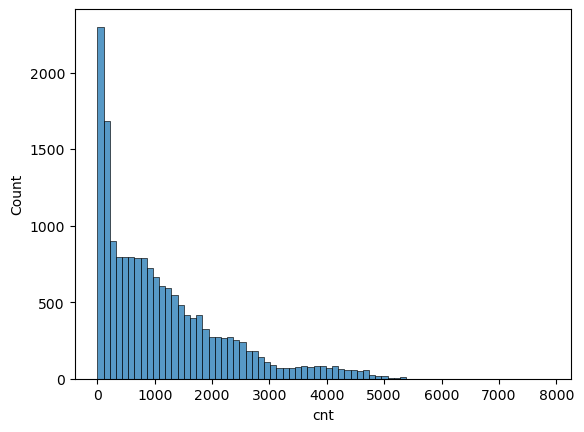

In [16]:
sns.histplot(data=data,x='cnt')

In [17]:
data[data['t1']==0]['t1'].value_counts()

0.0    34
Name: t1, dtype: int64

In [18]:
data[data['t2']==0]['t2'].value_counts()

0.0    232
Name: t2, dtype: int64

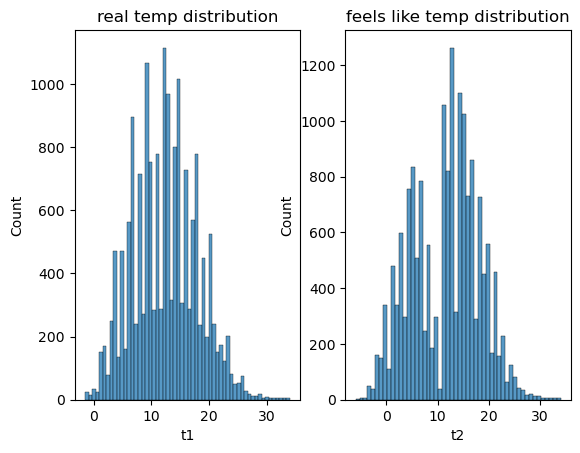

In [19]:
plt.subplot(1,2,1)
sns.histplot(data=data,x='t1')
plt.title('real temp distribution')
plt.subplot(1,2,2)
sns.histplot(data=data,x='t2')
plt.title('feels like temp distribution')
plt.show()

<Axes: xlabel='hum', ylabel='Count'>

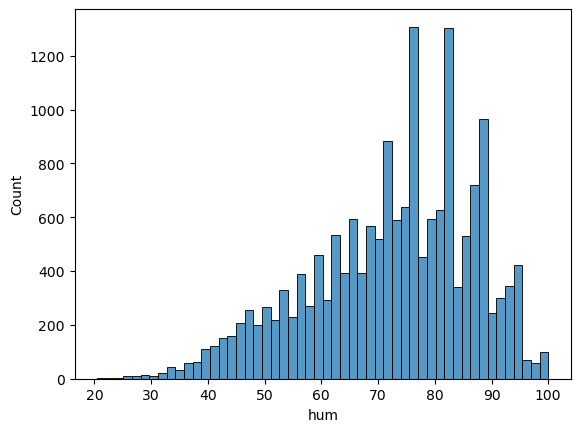

In [20]:
## humidity distribution
sns.histplot(data=data,x='hum')

<Axes: xlabel='wind_speed', ylabel='Count'>

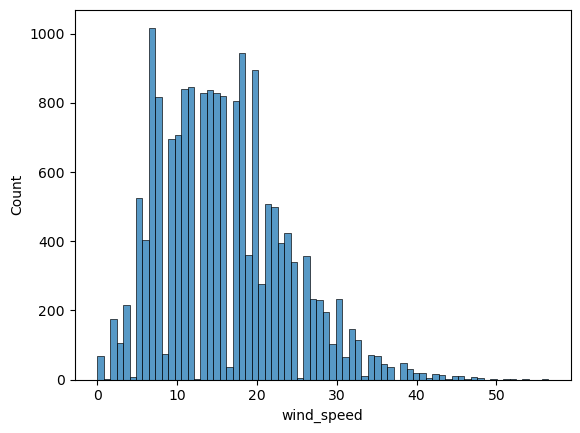

In [21]:
sns.histplot(data=data,x='wind_speed')

In [22]:
data[data['wind_speed']==0]['wind_speed'].value_counts()

0.0    68
Name: wind_speed, dtype: int64

The Timestamp column is in object format -- converting to datetime 

In [23]:
data['timestamp']=pd.to_datetime(data['timestamp'])
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17414 entries, 0 to 17413
Data columns (total 10 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   timestamp     17414 non-null  datetime64[ns]
 1   cnt           17414 non-null  int64         
 2   t1            17414 non-null  float64       
 3   t2            17414 non-null  float64       
 4   hum           17414 non-null  float64       
 5   wind_speed    17414 non-null  float64       
 6   weather_code  17414 non-null  float64       
 7   is_holiday    17414 non-null  float64       
 8   is_weekend    17414 non-null  float64       
 9   season        17414 non-null  float64       
dtypes: datetime64[ns](1), float64(8), int64(1)
memory usage: 1.3 MB


## Exploring the bike shares


In [24]:
## seperating the time stamp data to year, month, day, and hours
data['timestamp']

0       2015-01-04 00:00:00
1       2015-01-04 01:00:00
2       2015-01-04 02:00:00
3       2015-01-04 03:00:00
4       2015-01-04 04:00:00
                ...        
17409   2017-01-03 19:00:00
17410   2017-01-03 20:00:00
17411   2017-01-03 21:00:00
17412   2017-01-03 22:00:00
17413   2017-01-03 23:00:00
Name: timestamp, Length: 17414, dtype: datetime64[ns]

In [25]:
data.set_index('timestamp',inplace=True)
data.head()


,cnt,t1,t2,hum,wind_speed,weather_code,is_holiday,is_weekend,season
timestamp,,,,,,,,,
2015-01-04 00:00:00,182,3.0,2.0,93.0,6.0,3.0,0.0,1.0,3.0
2015-01-04 01:00:00,138,3.0,2.5,93.0,5.0,1.0,0.0,1.0,3.0
2015-01-04 02:00:00,134,2.5,2.5,96.5,0.0,1.0,0.0,1.0,3.0
2015-01-04 03:00:00,72,2.0,2.0,100.0,0.0,1.0,0.0,1.0,3.0
2015-01-04 04:00:00,47,2.0,0.0,93.0,6.5,1.0,0.0,1.0,3.0


In [26]:
data['hour']=data.index.hour
data['month']=data.index.month
data['month_day']=data.index.day
data['week_day']=data.index.day_of_week
data.head()

,cnt,t1,t2,hum,wind_speed,weather_code,is_holiday,is_weekend,season,hour,month,month_day,week_day
timestamp,,,,,,,,,,,,,
2015-01-04 00:00:00,182,3.0,2.0,93.0,6.0,3.0,0.0,1.0,3.0,0,1,4,6
2015-01-04 01:00:00,138,3.0,2.5,93.0,5.0,1.0,0.0,1.0,3.0,1,1,4,6
2015-01-04 02:00:00,134,2.5,2.5,96.5,0.0,1.0,0.0,1.0,3.0,2,1,4,6
2015-01-04 03:00:00,72,2.0,2.0,100.0,0.0,1.0,0.0,1.0,3.0,3,1,4,6
2015-01-04 04:00:00,47,2.0,0.0,93.0,6.5,1.0,0.0,1.0,3.0,4,1,4,6


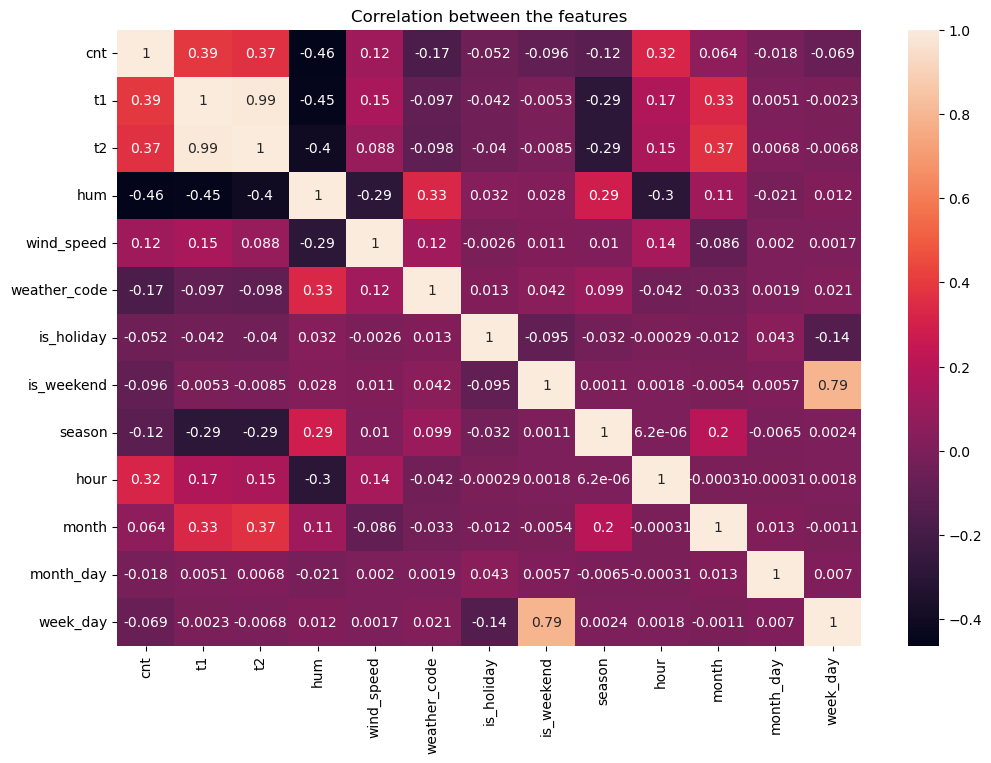

In [27]:
plt.figure(figsize=(12,8))
sns.heatmap(data=data.corr(),annot=True)
plt.title('Correlation between the features')
plt.show()

Observation:
- There is high correlation between the real temperature and the feel like temperature, quite obvious.
- there is high negative correaltion between humidity and the count of bike shares therefore aas the humidity increases the count of bike shares must drop, We'll visualize this later.


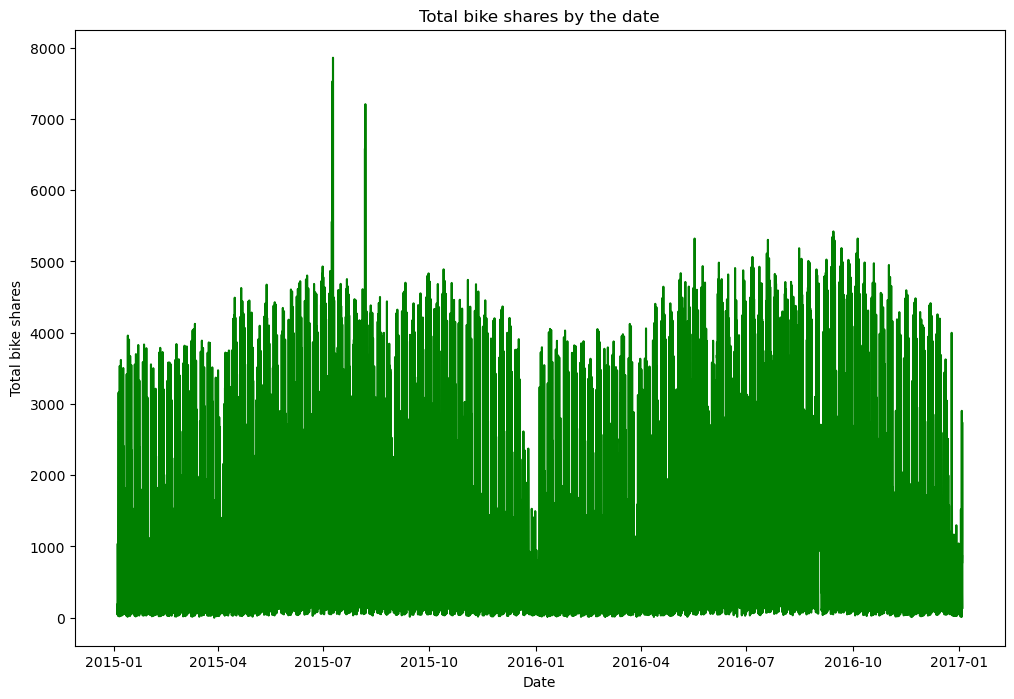

In [28]:
plt.figure(figsize=(12,8))
sns.lineplot(data=data,x=data.index,y=data.cnt,color='green')
plt.xlabel('Date')
plt.ylabel('Total bike shares')
plt.title('Total bike shares by the date')
plt.show()

The graph shows us the data of the bike shares by the date, Which doesn't provide us with much insights therefore let's use resampling 

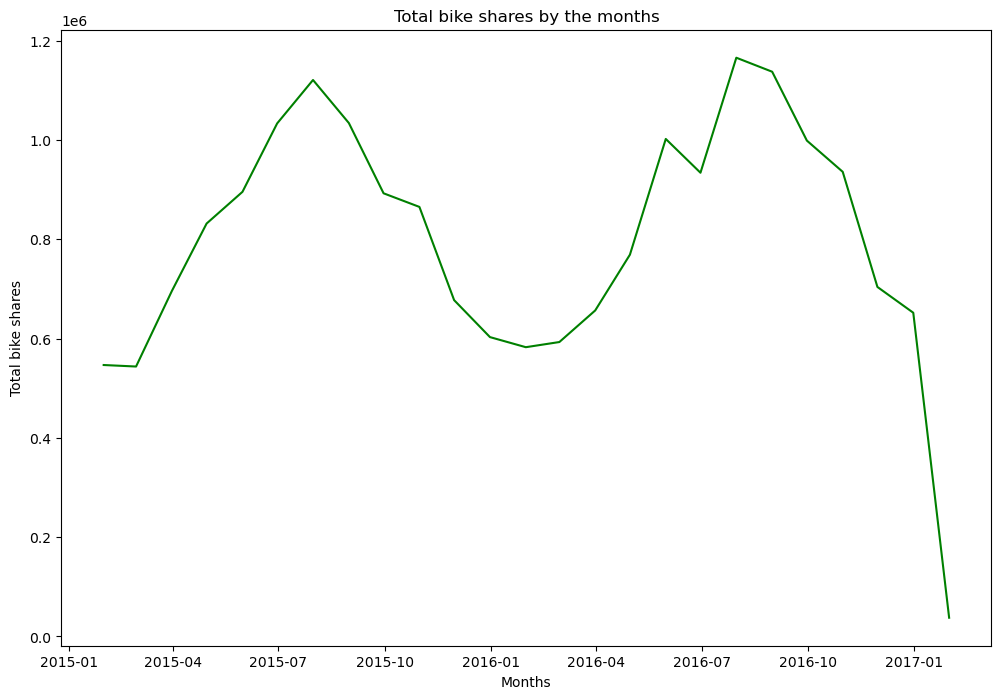

In [29]:
monthly_data=data.resample("M").sum()
plt.figure(figsize=(12,8))
sns.lineplot(data=monthly_data,x=monthly_data.index,y=monthly_data.cnt,color='green')
plt.xlabel('Months')
plt.ylabel('Total bike shares')
plt.title('Total bike shares by the months')
plt.show()

We can observe that the number of bike shares is considerably high during the summer season and the trend shows a fall in the count of bike shares during the winter season.

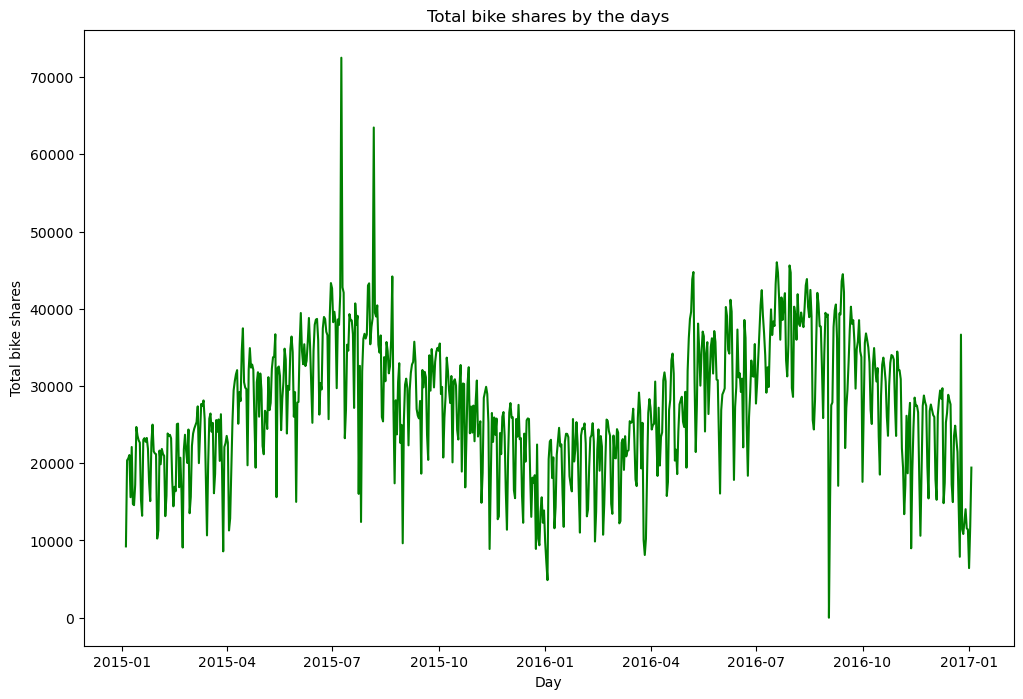

In [30]:
## let's observe the daily trend
daily_data=data.resample("D").sum()
plt.figure(figsize=(12,8))
sns.lineplot(data=daily_data,x=daily_data.index,y=daily_data.cnt,color='green')
plt.xlabel('Day')
plt.ylabel('Total bike shares')
plt.title('Total bike shares by the days')
plt.show()

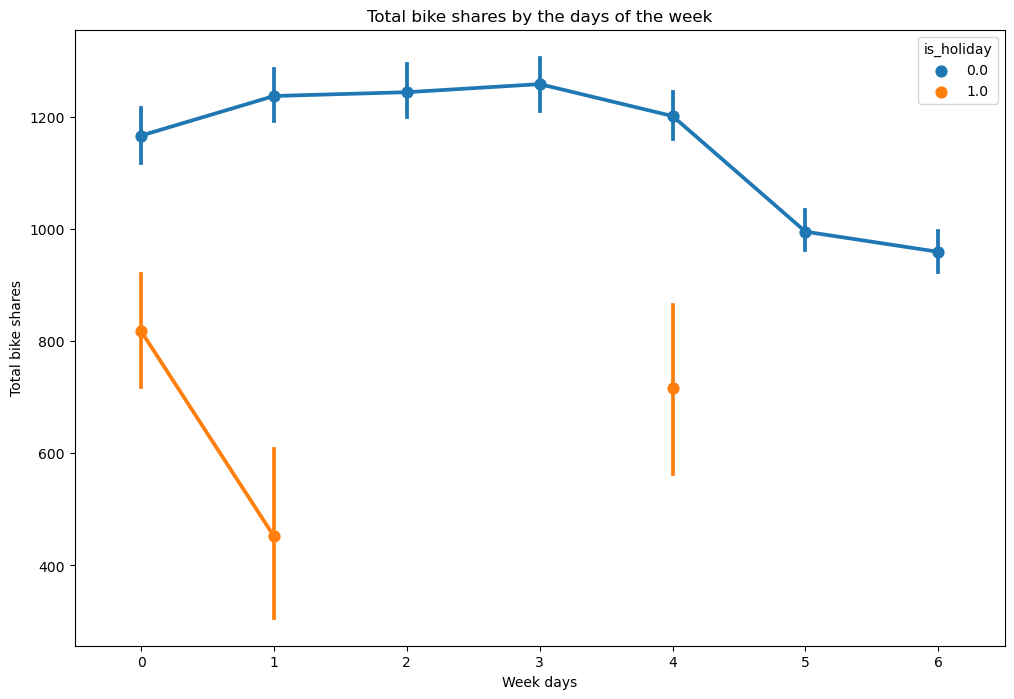

In [31]:
## Let's observe the bike shares hourly
plt.figure(figsize=(12,8))
sns.pointplot(data=data,x='week_day',y='cnt',hue='is_holiday')
plt.xlabel('Week days')
plt.ylabel('Total bike shares')
plt.title('Total bike shares by the days of the week')
plt.show()

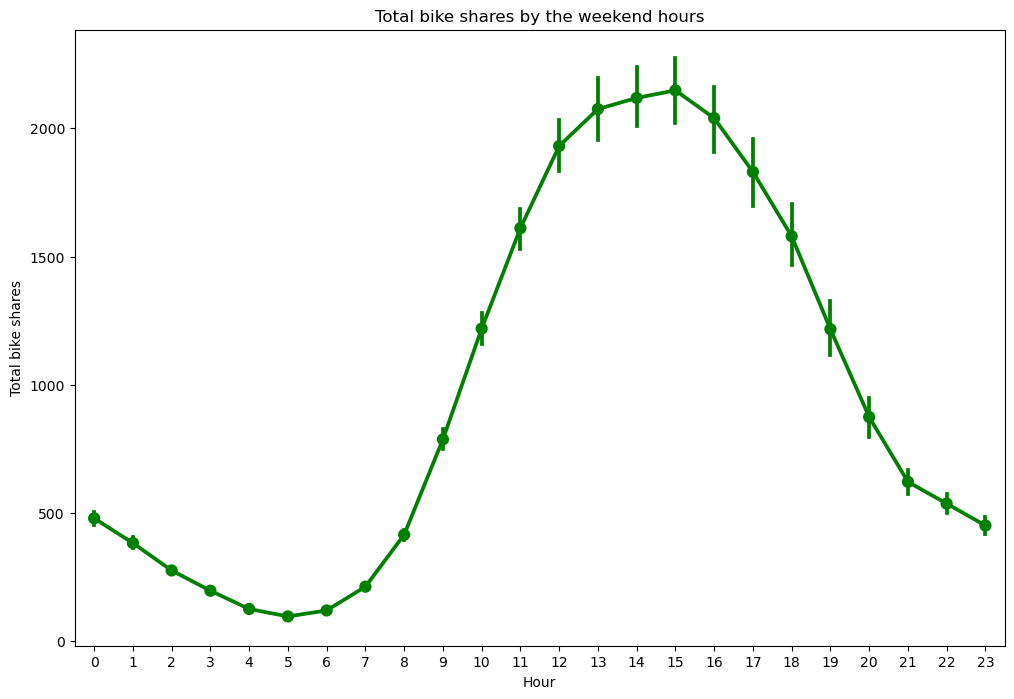

In [32]:
weekend_data=data[data['is_weekend']==1]
plt.figure(figsize=(12,8))
sns.pointplot(data=weekend_data,x='hour',y='cnt',color='green')
plt.xlabel('Hour')
plt.ylabel('Total bike shares')
plt.title('Total bike shares by the weekend hours')
plt.show()

On weekends the maximum number of bikes are rented during the afternoon hours between 1300:1600 hours

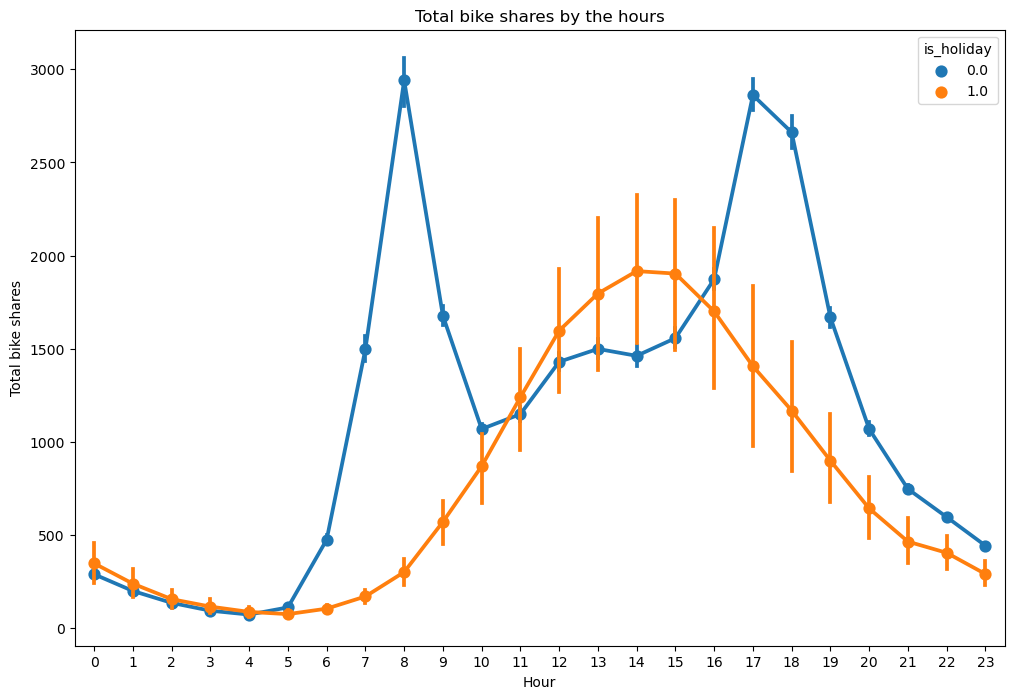

In [33]:
plt.figure(figsize=(12,8))
sns.pointplot(data=data,x='hour',y='cnt',hue='is_holiday')
plt.xlabel('Hour')
plt.ylabel('Total bike shares')
plt.title('Total bike shares by the hours')
plt.show()

As observed earlier the count of the bike shares on weekends was maximum during the afternoon hours. On the weekdays it's quite the opposite the count of bike sharing is high on rush hours 7-9 during the mornings and 16:00-18:00 during the evenings

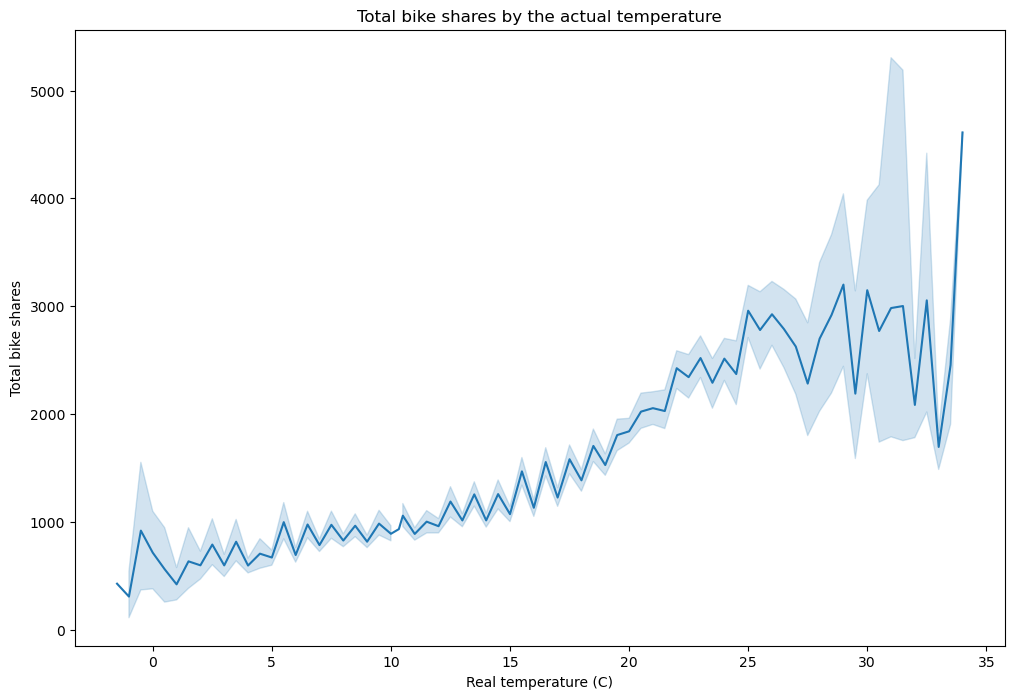

In [34]:
## let's observe the trend with respect to the real and feel_like temp
plt.figure(figsize=(12,8))
sns.lineplot(data=data,x='t1',y='cnt')
plt.xlabel('Real temperature (C)')
plt.ylabel('Total bike shares')
plt.title('Total bike shares by the actual temperature')
plt.show()

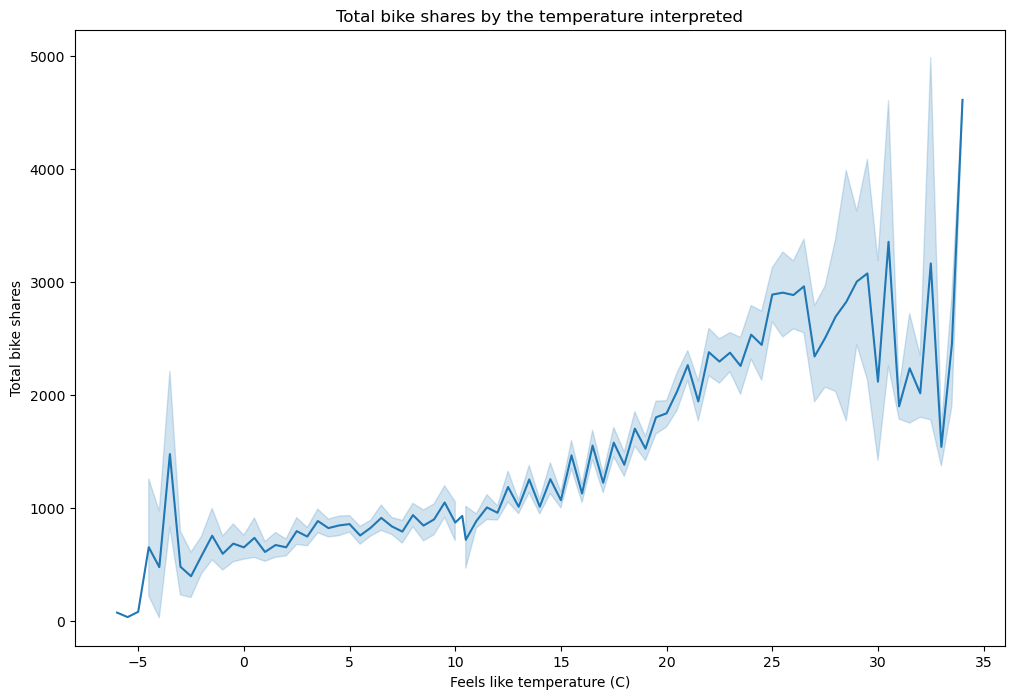

In [35]:
plt.figure(figsize=(12,8))
sns.lineplot(data=data,x='t2',y='cnt')
plt.xlabel('Feels like temperature (C)')
plt.ylabel('Total bike shares')
plt.title('Total bike shares by the temperature interpreted')
plt.show()

People are likely to rent a bike when the temperature is high or if it feels like it's high. Let's observe the realtion with the humidity there must be correlation bteween these values

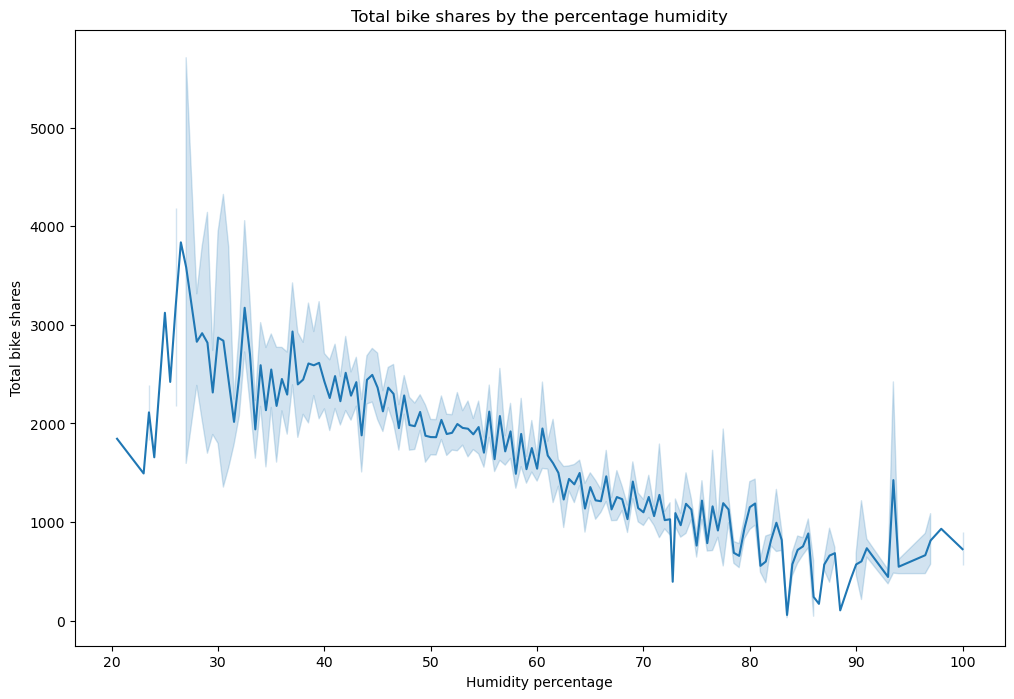

In [36]:
plt.figure(figsize=(12,8))
sns.lineplot(data=data,x='hum',y='cnt')
plt.xlabel('Humidity percentage')
plt.ylabel('Total bike shares')
plt.title('Total bike shares by the percentage humidity')
plt.show()

If there is high humidity then people are not likely to rent a bike 

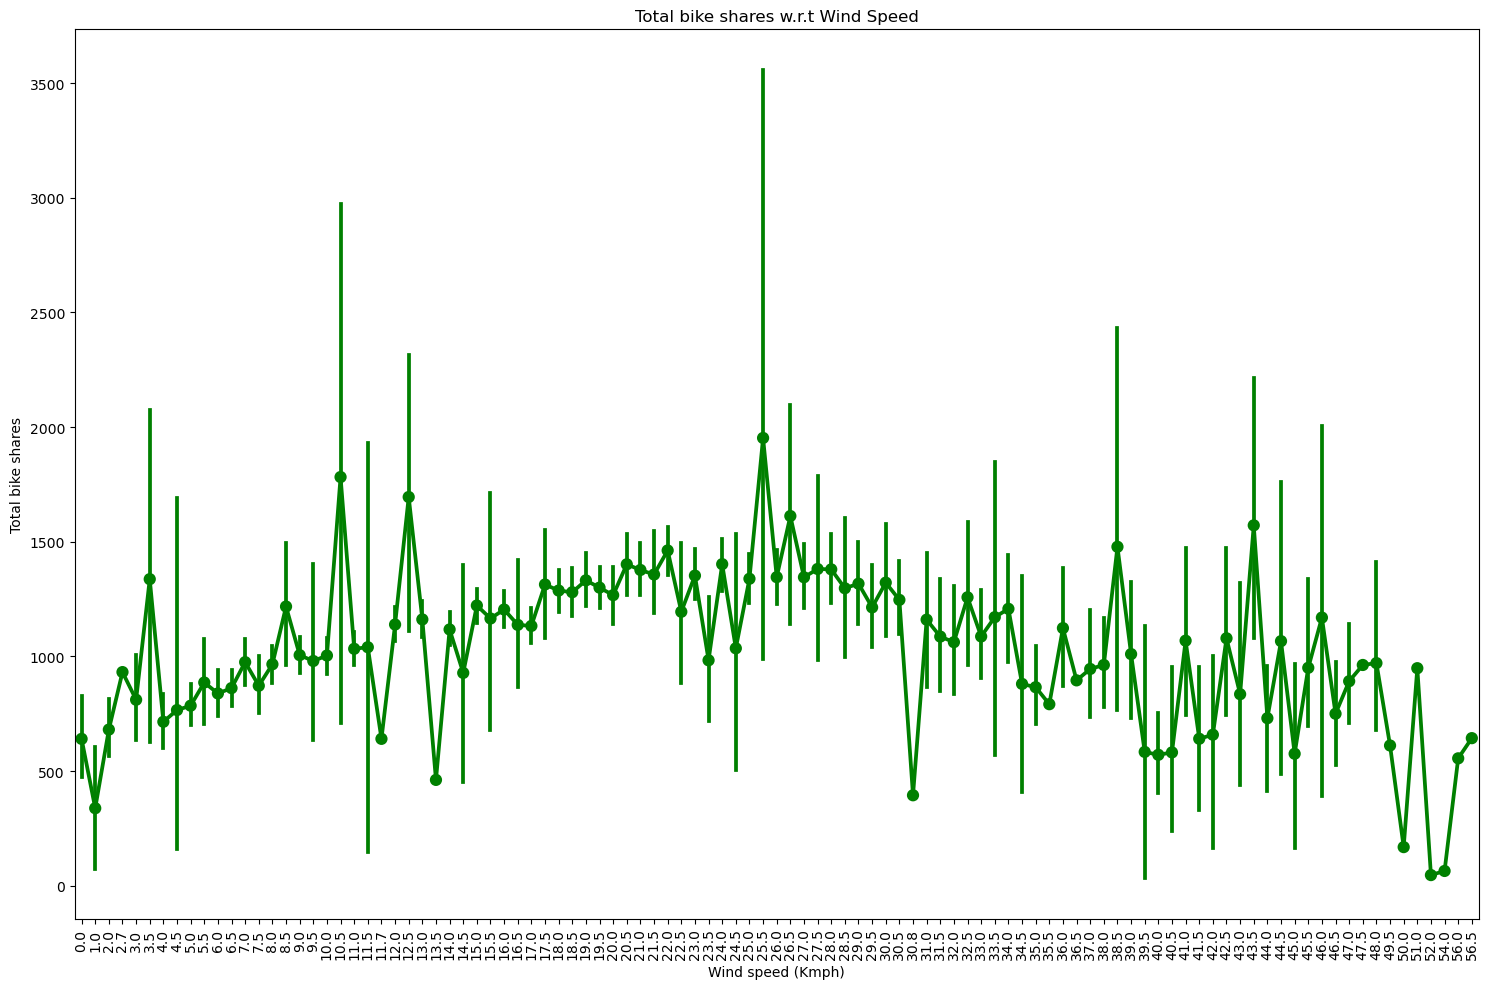

In [37]:
data['wind_speed']=round(data['wind_speed'],1)
plt.figure(figsize=(15,10))
sns.pointplot(data=data,x='wind_speed',y='cnt',color='green')
plt.xlabel('Wind speed (Kmph)')
plt.xticks(rotation=90)
plt.ylabel('Total bike shares')
plt.title('Total bike shares w.r.t Wind Speed')
plt.tight_layout()
plt.show()

There is a peak in the number of bike shares at wind speed in the range 25 - 26 kmph